# Ахметов Линар 6133-010402D
## Вариант 2

# Задание

Сгенерировать __N__ облаков (классов) с __M__ точками (объектами) в каждом. Построить классификатор используя *scikit-learn* который достигнет точности __R__ лежащей в интервале __(R1, R2)__.

----
Generate <b>N</b> clouds (classes) with <b>M</b> points (samples) in each cloud. Build classificator (SKLearn) which yields an accuracy <b>R</b> within the interval <b>(R1, R2)</b>. <br>

In [1]:
N = 5 # число классов
M = 877 # число элементов в классе
R1 = 0.598 # min
R2 = 0.610 # max

In [2]:
# N = 6 # число классов
# M = 735 # число элементов в классе
# R1 = 0.613 # min
# R2 = 0.618 # max

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

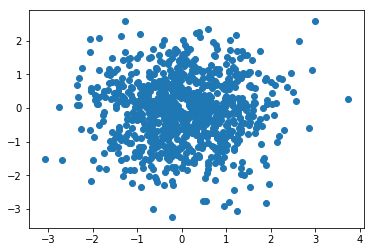

In [4]:
np.random.seed(7)
noise = np.random.randn(M, 2) # M points, 2 coordinates
plt.scatter(noise[:,0], noise[:,1])

In [5]:
noise.shape

(877, 2)

### Создадим облако точек разных классов

(4385, 2)

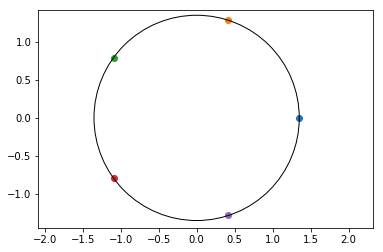

In [6]:
import math

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='datalim')

# Радиус окружности
r_shift = 1.35
# Облако точек
clouds=np.zeros((N*M, 2))

# Добавим для каждого класса точки в массив clouds
for i in range(0, N):
    # Определим координаты центра облака класса (x,y) как точки на окружности
    phi = 2*np.pi/N*i
    x_shift = r_shift*math.cos(phi)
    y_shift = r_shift*math.sin(phi)
    ax.scatter(x_shift,y_shift)
    # Добавляем в массив облако точкек со смещением
    clouds[i*M:(i+1)*M] = noise + np.array([x_shift, y_shift])
# Рисуем окружность
draw_circle = plt.Circle((0, 0), r_shift,fill=False)
ax.add_patch(draw_circle)
# Выводим размерность полученного массива
clouds.shape

### Определим метки для всех точек облака

In [7]:
label = []
for i in range(N):
    label+=([i+1]*M) # метки класса

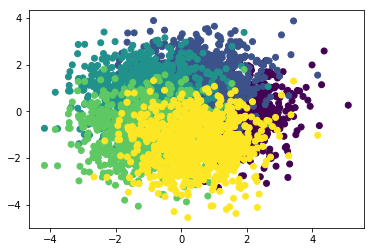

In [8]:
plt.scatter(clouds[:,0],clouds[:,1], c=label)

### Перемешаем данные

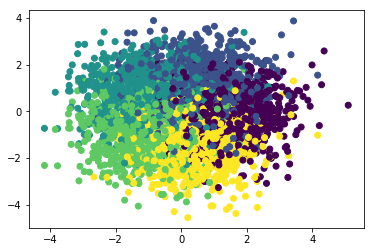

In [9]:
data, labels = shuffle(clouds, label, random_state=7)
plt.scatter(data[:, 0], data[:, 1], c=labels)

In [10]:
test_size = int(len(data) * 0.5)
Xtrain = data[:test_size]
Ytrain = labels[:test_size]
Xtest = data[test_size:]
Ytest = labels[test_size:]

### Обучим модель

In [11]:
clf = LogisticRegression(random_state=2)
clf.fit(Xtrain, Ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Предскажем метку на тестовых данных и выведем confusion матрицу

In [12]:
predictions = clf.predict(Xtest)
confusion_matrix(Ytest, predictions)

array([[280,  71,   8,   4,  63],
       [ 80, 266,  60,  20,  12],
       [ 16,  89, 252,  80,  10],
       [ 14,  14,  67, 275,  57],
       [ 86,  16,  11,  88, 254]])

### Вычислим точность предсказания

In [13]:
R = accuracy_score(Ytest, predictions)
R

0.6051071591427268

In [14]:
(R1, R2)

(0.598, 0.61)

### Убеждаемся, что R лежит в [R1, R2]:

In [15]:
assert (R1 < R and R < R2)